In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import patsy # R style formula
import seaborn as sns

%matplotlib inline

# Data Processing 

In [3]:
df = pd.read_csv('C:\Users\Yeoni\Desktop\homocide_report\Homicide_Reports_1980-2014.csv')

df.tail()

,Record_ID,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,...,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
638449,638450,Park_County,4,Park,51,2014,1,1,1,0,...,1,3,0,5,3,28,9,0,0,1
638450,638451,Sheridan_County,4,Sheridan,51,2014,6,1,1,1,...,3,1,57,4,3,1,9,0,0,1
638451,638452,Sheridan,2,Sheridan,51,2014,9,1,1,1,...,3,2,22,1,3,7,15,0,0,1
638452,638453,Sublette_County,4,Sublette,51,2014,12,1,1,1,...,2,1,31,4,2,26,10,0,1,1
638453,638454,Rock_Springs,2,Sweetwater,51,2014,9,1,1,1,...,2,2,24,4,2,7,1,0,1,1


In [5]:
df.dtypes

# Agency Name, City는 변환 X

Record_ID                 int64
Agency_Name              object
Agency_Type               int64
City                     object
State                     int64
Year                      int64
Month                     int64
Incident                  int64
Crime_Type                int64
Crime_Solved              int64
Victim_Sex                int64
Victim_Age                int64
Victim_Race               int64
Victim_Ethnicity          int64
Perpetrator_Sex           int64
Perpetrator_Age           int64
Perpetrator_Race          int64
Perpetrator_Ethnicity     int64
Relationship              int64
Weapon                    int64
Victim_Count              int64
Perpetrator_Count         int64
Record_Source             int64
dtype: object

##  Correlation Status

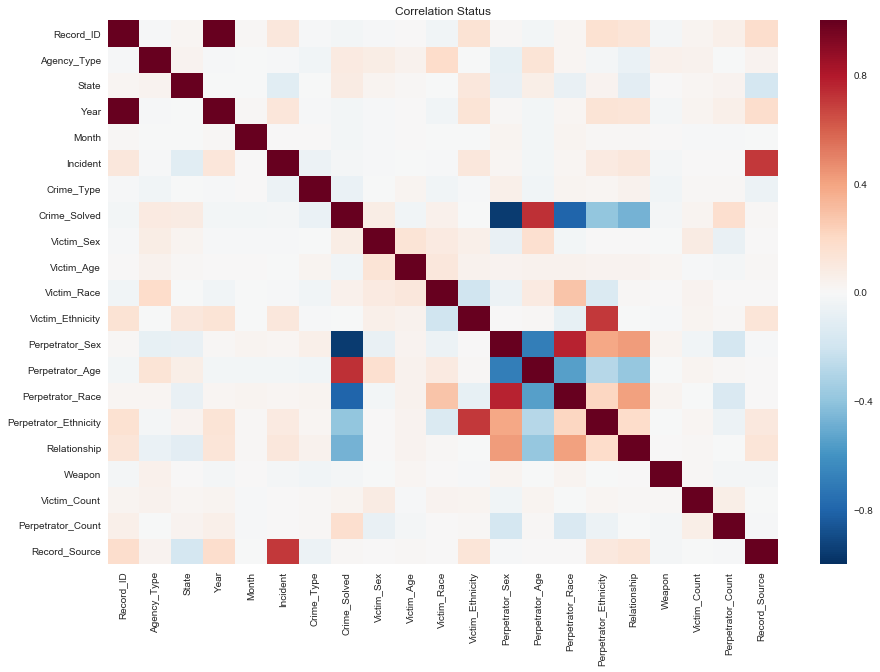

In [10]:
fig = plt.figure(figsize = (15, 10))
corrmat = df.corr()
sns.heatmap(corrmat)
plt.title("Correlation Status")
plt.show()

In [11]:
corr_stack = corrmat.abs().unstack()
ordered_stack = corr_stack.order(kind="quicksort", ascending=False)
order_ix = []

for num in range(len(ordered_stack)):
    if ordered_stack[num] > 0.6 and ordered_stack[num] < 1.0:
        order_ix.append(num)

print ordered_stack[min(order_ix):max(order_ix)]

Record_ID              Year                     0.997286
Year                   Record_ID                0.997286
Perpetrator_Sex        Crime_Solved             0.956824
Crime_Solved           Perpetrator_Sex          0.956824
                       Perpetrator_Race         0.803998
Perpetrator_Race       Crime_Solved             0.803998
                       Perpetrator_Sex          0.766897
Perpetrator_Sex        Perpetrator_Race         0.766897
Perpetrator_Age        Crime_Solved             0.733982
Crime_Solved           Perpetrator_Age          0.733982
Record_Source          Incident                 0.705192
Incident               Record_Source            0.705192
Victim_Ethnicity       Perpetrator_Ethnicity    0.703251
Perpetrator_Ethnicity  Victim_Ethnicity         0.703251
Perpetrator_Sex        Perpetrator_Age          0.689062
dtype: float64


C:\Users\Yeoni\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


In [9]:
df["Weapon"].value_counts()

9     317484
10     94962
1      67337
7      46980
16     33192
13     30722
12     23347
14      8110
6       6173
15      3968
8       2206
3       1588
2       1204
4        537
11       454
5        190
Name: Weapon, dtype: int64

In [20]:
np.unique(df["Weapon"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [21]:
df["Weapon"].replace([14,6,15,8,3,2,4,11,5],17, inplace=True)

np.unique(df["Weapon"])

array([ 1,  7,  9, 10, 12, 13, 16, 17], dtype=int64)

#### tie too low variables to 17 under 10,000 (2,3,4,5,6,8,11,14,15)

## Draw Bar Chart

In [13]:
df['Year'].value_counts()

1993    24335
1992    23793
1994    23246
1980    23092
1991    22657
1990    21246
1981    21208
1995    21179
1982    20544
1986    20125
1989    19868
1983    19653
1996    18969
1987    18783
1988    18779
1985    18386
1984    18093
1997    17794
2007    17303
2006    17275
2005    16836
2003    16512
2002    16268
2004    16233
1998    16061
2009    15840
2001    15803
2008    15595
2010    15121
2012    15033
2011    14756
2000    14671
1999    14621
2013    14445
2014    14331
Name: Year, dtype: int64

#### 1993년 이후로 총기규제법 제정

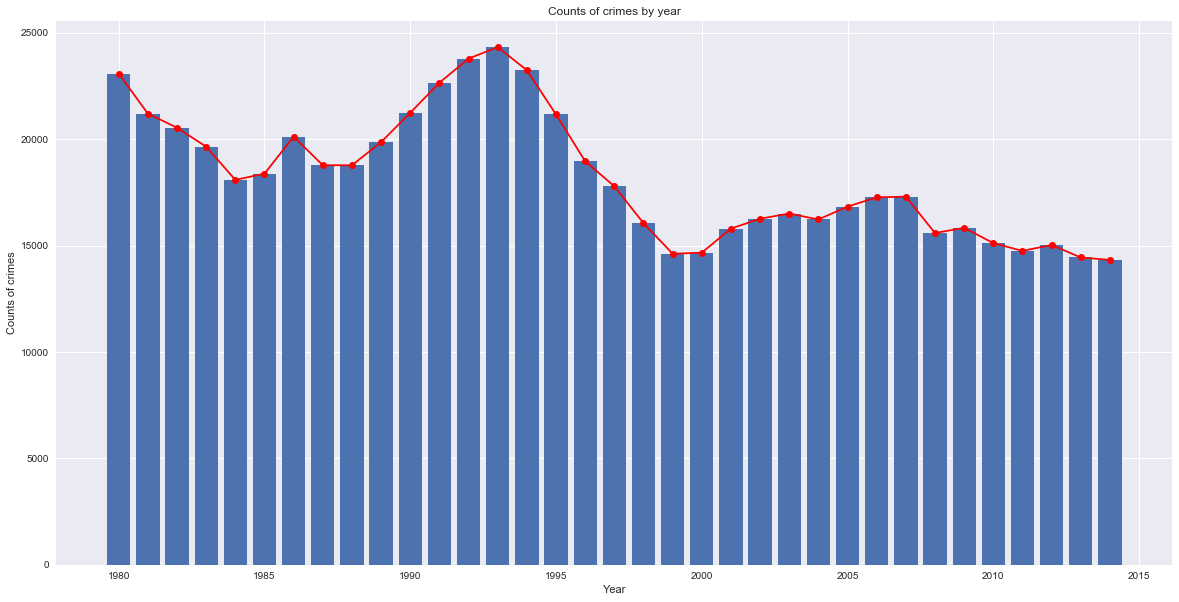

In [34]:
x = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,
    1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]
y = [23092,21208,20544,19653,18093,18386,20125,18783,18779,19868,
     21246,22657,23793,24335,23246,21169,18969,17794,16061,14621,
     14671,15803,16268,16512,16233,16836,17275,17303,15595,15840,
     15121,14756,15033,14445,14331]
plt.figure(figsize=(20,10))
plt.bar(x, y)
plt.plot(x, y, 'ro-')
plt.title('Counts of crimes by year')
plt.xlim=24
plt.xlabel('Year')
plt.ylabel('Counts of crimes')


# 1998 전후 유형 차이. 내부자료가 1순위

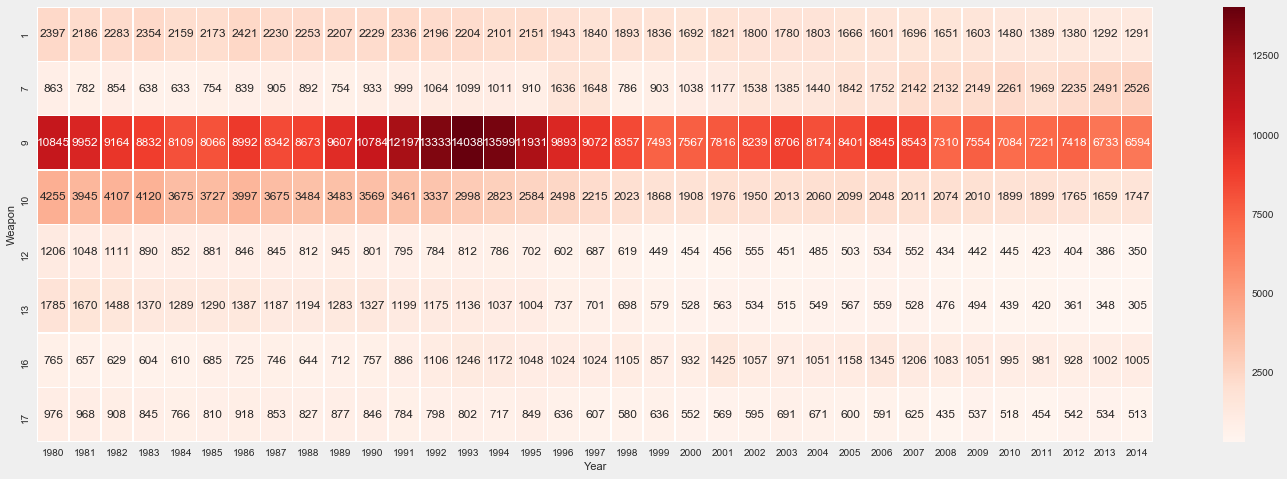

In [22]:
plt.figure(figsize=(25,8),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(df["Weapon"], df["Year"]), annot=True, fmt="d", linewidths=.5, cmap='Reds')

#### Firearm(7)의 수치가 올라가는 추세.

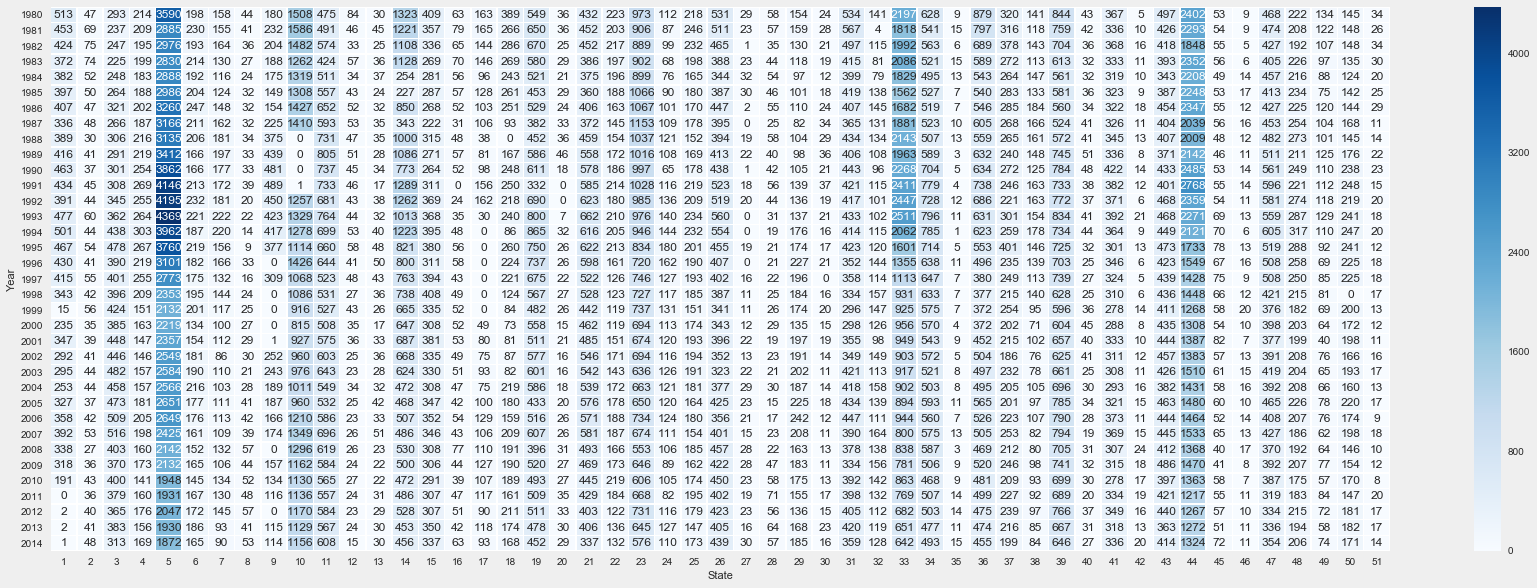

In [17]:
plt.figure(figsize=(30,10),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(df["Year"], df["State"]), annot=True, fmt="d", linewidths=.5, cmap='Blues')

#### California(5) , Florida(10), Michigan(23), New York(33), Texas(44)

법 제정 이후로 범죄 발생 횟수는 크게 줄어든 주들

In [18]:
pd.crosstab(df["Crime_Solved"],df["Year"],margins=True)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,All
Crime_Solved,,,,,,,,,,,,,,,,,,,,,
0,6363,5420,5484,5138,4848,4763,5305,5310,5388,5689,...,5349,5514,5057,4625,4415,4313,4458,4390,4381,190282
1,16729,15788,15060,14515,13245,13623,14820,13473,13391,14179,...,11926,11789,10538,11215,10706,10443,10575,10055,9950,448172
All,23092,21208,20544,19653,18093,18386,20125,18783,18779,19868,...,17275,17303,15595,15840,15121,14756,15033,14445,14331,638454


### 법 제정 후 인종

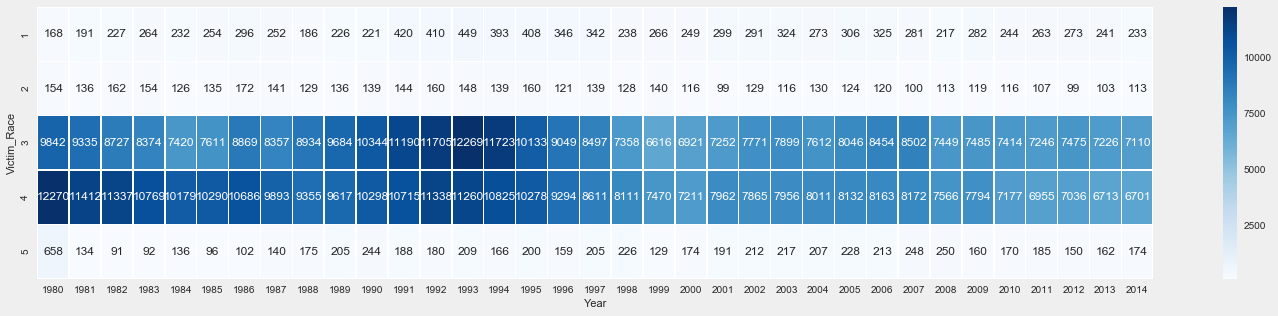

In [23]:

plt.figure(figsize=(25,5),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(df["Victim_Race"], df["Year"]), annot=True, fmt="d", linewidths=.5, cmap='Blues')

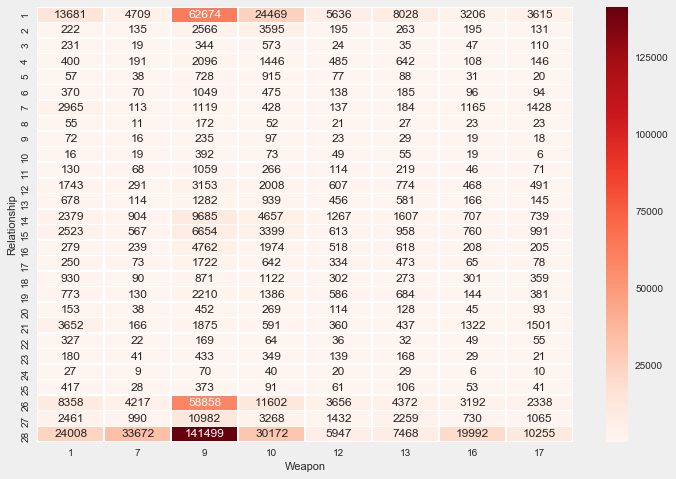

In [24]:
plt.figure(figsize=(12,8),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(df["Relationship"], df["Weapon"]), annot=True, fmt="d", linewidths=.5, cmap='Reds')

1. Acquaintance(1) & Handgun(9)
2. Stranger(26) & Handgun(9)
3. Unknown(28) & Handgun(9)
4. Unknown(28) & Firearm(7)
5. Unknown(28) & Knife(10)
6. Acquaintance(1) & Knife(10)
7. Unknown(28) & Blunt Object(1)
8. Firearm(화기)
9. blunt object(둔한 물체)

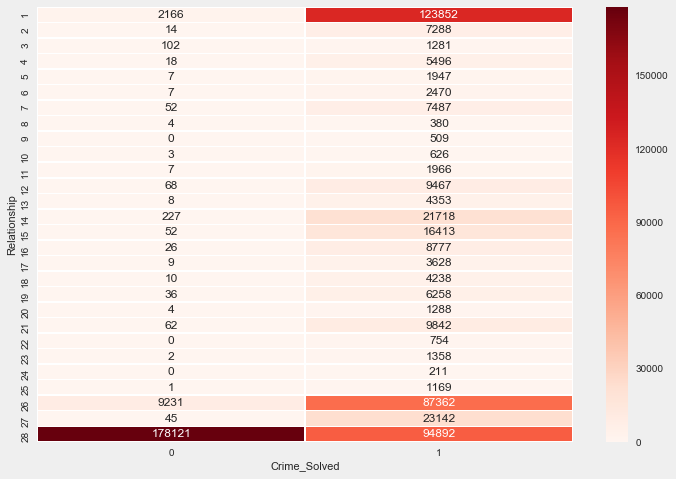

In [26]:
plt.figure(figsize=(12,8),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(df["Relationship"], df["Crime_Solved"]), annot=True, fmt="d", linewidths=.5, cmap='Reds')

1. Unknown(28) & Murder(1)
2. Acquiantance(1) & Murder(1)
3. Stranger(26) & Murder(1)
4. Wife(27) & Murder(1)
5. Friend(14) & Murder(1)
6. GirlFriend(15) & Murder(1)

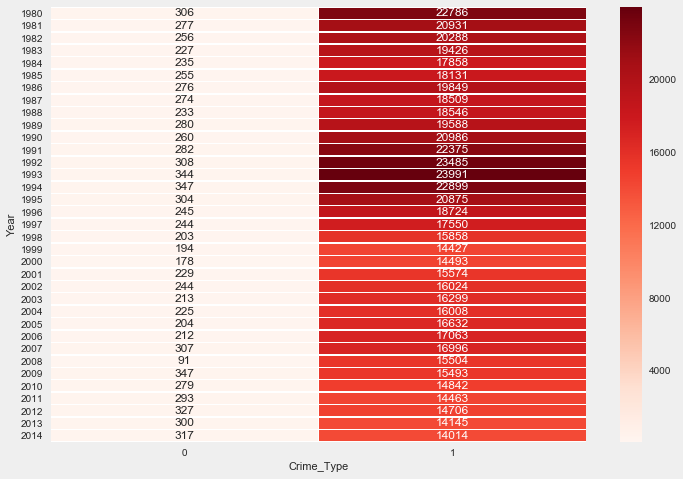

In [35]:
# 연도별 살인


plt.figure(figsize=(12,8),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(df["Year"], df["Crime_Type"]), annot=True, fmt="d", linewidths=.5, cmap='Reds')

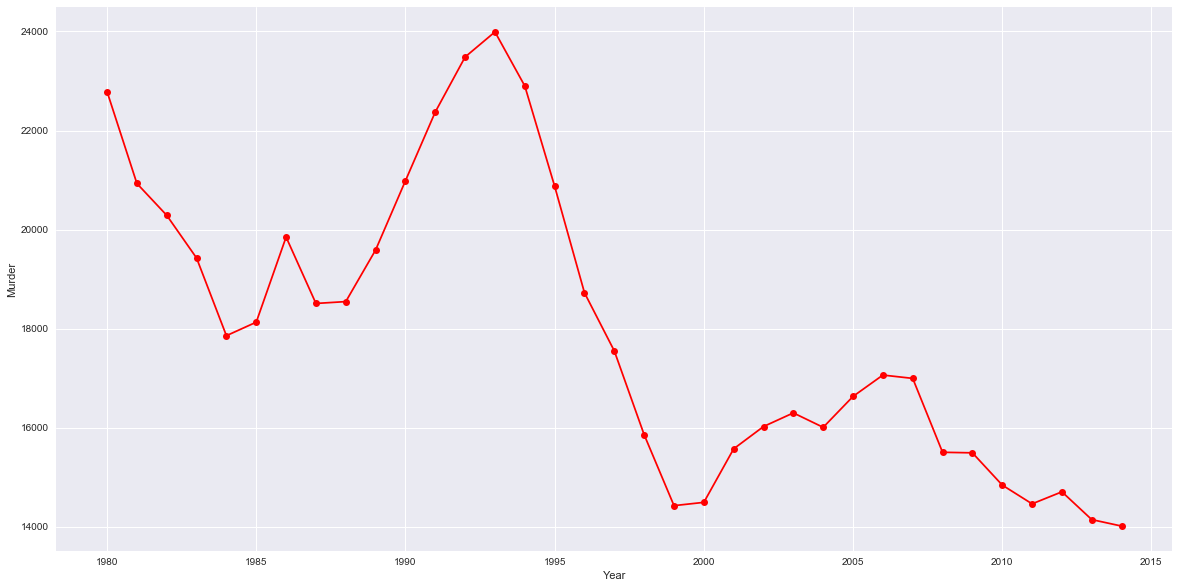

In [40]:
# 연도별 고의살인 plot 그래프

x = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,
    1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]
y = [22786,20931,20288,19426,17858,18131,19849,18509,18546,19588,20986,22375,23485,23991,22899,20875,18724,17550,15858,14427,
    14493,15574,16024,16299,16008,16632,17063,16996,15504,15493,14842,14463,14706,14145,14014]
plt.figure(figsize=(20,10))
plt.plot(x, y, 'ro-')
plt.xlabel("Year")
plt.ylabel("Murder")


## Rogistic Regression 

In [30]:
## Crime Solved ~ Relationship

result = sm.Logit.from_formula('Crime_Solved ~ C(Relationship)-1',data = df).fit()
# result = logit.fit()
print result.summary()

         Current function value: 0.348009
         Iterations: 35


C:\Users\Yeoni\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:           Crime_Solved   No. Observations:               638454
Model:                          Logit   Df Residuals:                   638426
Method:                           MLE   Df Model:                           27
Date:                Mon, 08 May 2017   Pseudo R-squ.:                  0.4287
Time:                        18:54:26   Log-Likelihood:            -2.2219e+05
converged:                      False   LL-Null:                   -3.8894e+05
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
C(Relationship)[1]      4.0462      0.022    186.686      0.000         4.004     4.089
C(Relationship)[2]      6.2549      0.268     23.381      0.000         5.731     6.779
C(Relationship)[

In [33]:
## Crime Type~ Relationship

result = sm.Logit.from_formula('Crime_Type ~ C(Relationship)-1',data = df).fit()
# result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.068503
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             Crime_Type   No. Observations:               638454
Model:                          Logit   Df Residuals:                   638426
Method:                           MLE   Df Model:                           27
Date:                Mon, 08 May 2017   Pseudo R-squ.:                 0.08473
Time:                        19:22:03   Log-Likelihood:                -43736.
converged:                       True   LL-Null:                       -47785.
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
C(Relationship)[1]      4.3354      0.025    173.848      0.000         4.287     4.384
C

In [32]:
## Crime Solved ~ Weapon

result = sm.Logit.from_formula('Crime_Solved ~ C(Weapon)',data = df).fit()
print result.summary()


Optimization terminated successfully.
         Current function value: 0.591849
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Crime_Solved   No. Observations:               638454
Model:                          Logit   Df Residuals:                   638446
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 May 2017   Pseudo R-squ.:                 0.02847
Time:                        18:55:15   Log-Likelihood:            -3.7787e+05
converged:                       True   LL-Null:                   -3.8894e+05
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.1796      0.009    129.806      0.000         1.162     1.197
C(Weapon)[T.7]

In [42]:
## Crime Type ~ Weapon

result = sm.Logit.from_formula('Crime_Type ~ C(Weapon)-1',data = df).fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.070727
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             Crime_Type   No. Observations:               638454
Model:                          Logit   Df Residuals:                   638446
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 May 2017   Pseudo R-squ.:                 0.05501
Time:                        20:13:36   Log-Likelihood:                -45156.
converged:                       True   LL-Null:                       -47785.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
C(Weapon)[1]      4.5837      0.039    119.011      0.000         4.508     4.659
C(Weapon)[7]      4